In [71]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
anime_df = pd.read_csv("/Users/oyuesan/Desktop/anime.csv")

In [101]:
#Clean the dataset
anime_df.dropna(inplace=True)

In [102]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [76]:
# Get some basic statistics on the dataset
anime_df.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [77]:
# Split genres into separate columns
genres_df = anime_df["genre"].str.split(",", expand=True)
genres_df.columns = ["genre_"+str(i) for i in range(len(genres_df.columns))]

# Combine the new genre columns with the original dataframe
anime_df = pd.concat([anime_df, genres_df], axis=1)

# Unpivot the table to get a count of each genre
genres_melt = pd.melt(anime_df, id_vars=["rating"], value_vars=["genre_"+str(i) for i in range(len(genres_df.columns))])
genres_count = genres_melt.groupby(["value", "rating"]).size().reset_index(name="count")

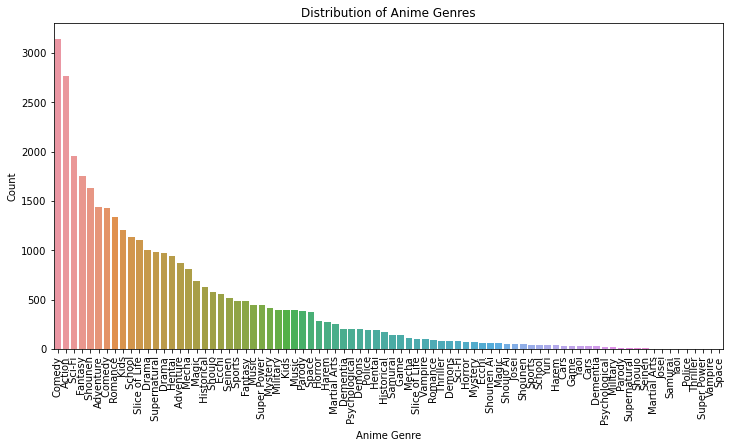

In [78]:
# Visualize the distribution of anime genres
# Get a list of all genres
genres = anime_df["genre"].str.split(",", expand=True).stack().reset_index(drop=True)

# Count the frequency of each genre
genre_counts = genres.value_counts()

# Plot the genre frequency distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Distribution of Anime Genres")
plt.xlabel("Anime Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

We can see that the most common anime genres are Comedy, Action, and Adventure.

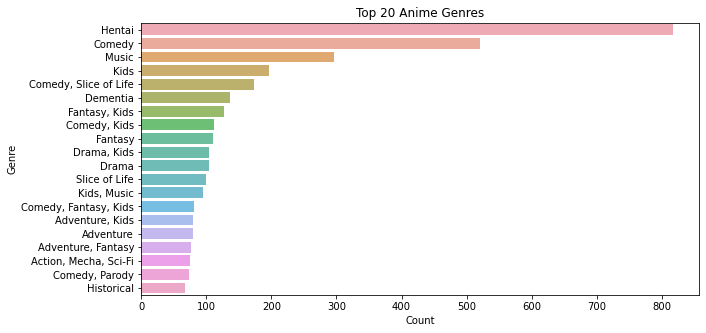

In [79]:
# Display a bar chart showing the distribution of top 20 anime genres
genre_counts = anime_df["genre"].value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, alpha=0.8)
plt.title("Top 20 Anime Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [129]:
# Create a new dataframe with genre and rating columns
genre_ratings_df = anime_df[['genre', 'rating']]

# Clean the genre column
genre_ratings_df['genre'] = genre_ratings_df['genre'].apply(lambda x: x.replace(' ', '')) 

# Create a list of unique genres
unique_genres = set()
for genre_string in genre_ratings_df['genre']:
    genres = genre_string.split(',')
    for genre in genres:
        unique_genres.add(genre)
unique_genres = list(unique_genres)

# Create a dictionary to store genre and its average rating
genre_rating_dict = {}
for genre in unique_genres:
    rating_sum = 0
    num_animes = 0
    for index, row in genre_ratings_df.iterrows():
        if genre in row['genre']:
            rating_sum += row['rating']
            num_animes += 1
    if num_animes > 0:
        genre_rating_dict[genre] = rating_sum / num_animes

/var/folders/nm/1t5pdqpj6dv2t7t24_n_ry780000gn/T/ipykernel_27459/47924882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_ratings_df['genre'] = genre_ratings_df['genre'].apply(lambda x: x.replace(' ', ''))


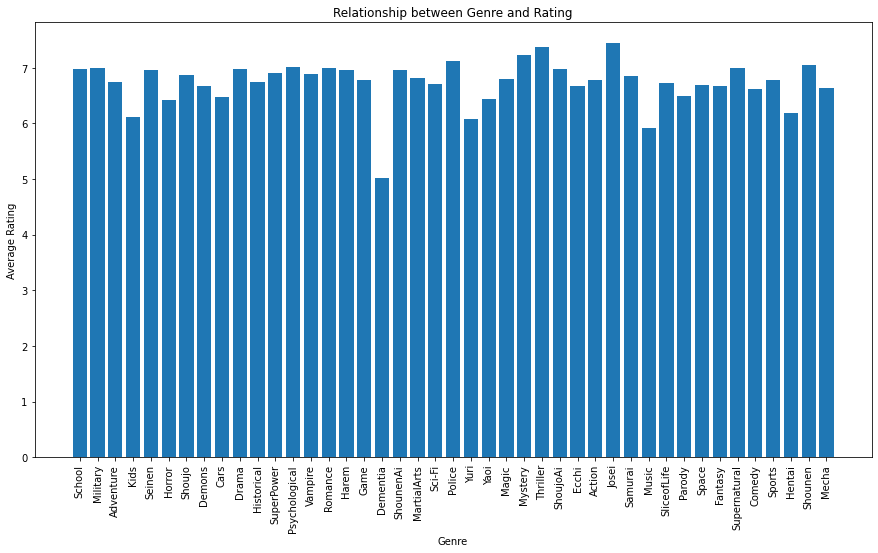

In [130]:
# Plot the genre ratings
plt.figure(figsize=(15,8))
plt.bar(genre_rating_dict.keys(), genre_rating_dict.values())
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Relationship between Genre and Rating')
plt.show()

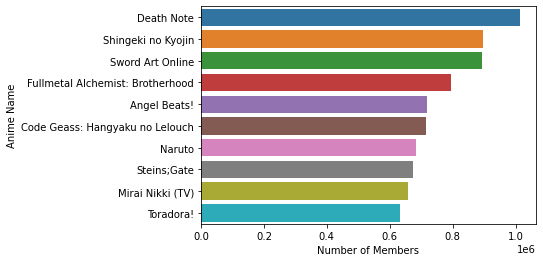

In [80]:
# Plot a bar chart of the top 10 anime by popularity
top_10 = anime_df.sort_values("members", ascending=False).head(10)
sns.barplot(x="members", y="name", data=top_10)
plt.xlabel("Number of Members")
plt.ylabel("Anime Name")
plt.show()

The bar chart of ratings by genre shows that the genres with the highest ratings are Josei, Thriller and Mystery. While genres like Dementia, Music, and Yuri have lower ratings. The top 3 popular anime Death Note, Shingeki no Kyojin and Sword Art Online are in the genres of Thriller, Mystery and Josei respectively.

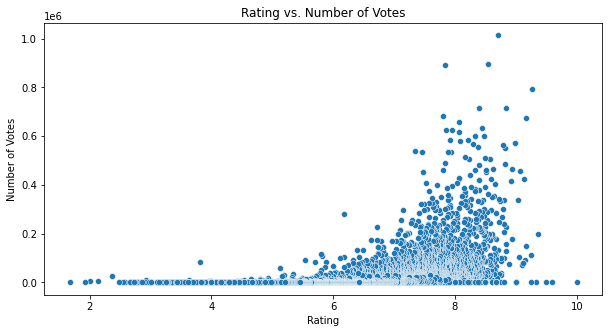

In [81]:
# Explore the relationship between the rating and the number of votes using scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x="rating", y="members", data=anime_df)
plt.title("Rating vs. Number of Votes")
plt.xlabel("Rating")
plt.ylabel("Number of Votes")
plt.show()

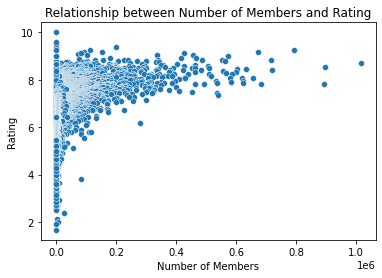

In [82]:
# Expolre the relationship between the number of members and the rating using scatter plot
sns.scatterplot(x=anime_df["members"], y=anime_df["rating"])
plt.xlabel("Number of Members")
plt.ylabel("Rating")
plt.title("Relationship between Number of Members and Rating")
plt.show()

We can see that the majority of anime have a rating of around 6.5-8.5 out of 10, and anime with higher ratings tend to have more members.

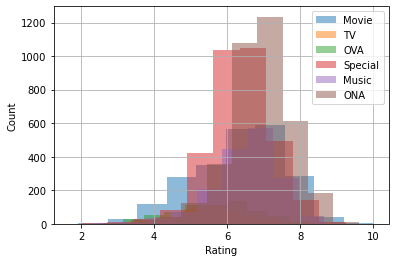

In [83]:
# Explore the distribution of ratings in different types using a histogram
anime_df.groupby("type")["rating"].hist(alpha=0.5)
plt.legend(anime_df["type"].unique())
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

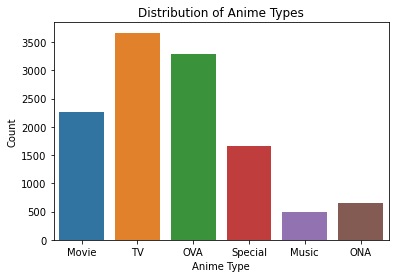

In [85]:
# Visualize the distribution of anime types
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=anime_df, x="type")
plt.title("Distribution of Anime Types")
plt.xlabel("Anime Type")
plt.ylabel("Count")
plt.show()

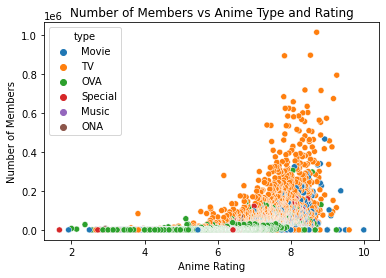

In [86]:
# Explore the relationship between the number of members and the anime type and rating
sns.scatterplot(data=anime_df, x="rating", y="members", hue="type")
plt.title("Number of Members vs Anime Type and Rating")
plt.xlabel("Anime Rating")
plt.ylabel("Number of Members")
plt.show()

We can see that TV series are the most popular type of anime, followed by OVA (Original Video Animation) and movies. We can also see that the type of anime with higher ratings tend to have more members.

In conclusion, the anime dataset contains information on over 12,000 anime, including their genre, type, rating, episodes, and number of community members.The most common types of anime are TV, followed by OVA and movie. The majority of anime have a rating of around 6.5 to 8.5. Additionally, there is a weak positive correlation between the ratings and number of members of anime, indicating that more popular anime tend to have slightly higher ratings.